# Loading Data

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
print(x_train.shape, x_test.shape)
print(labels_train.shape, labels_test.shape)
# x_train is the handstroke image
# labels_train are according labels =>array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
# # x_train[1, :].shape # 28*28*1
# import matplotlib.pyplot as plt
# import matplotlib.image as img
# myimage = img.imread("xxx.jpg")

# # plt.imshow(x_train[1,:].reshape(28,28), cmap=plt.get_cmap('gray'))
# # plt.imshow(myimage[:, :, 1], cmap=plt.get_cmap('gray'))
# # x_test.shape

# mytest = np.zeros((1, 28, 28, 1))
# mytest[0, :, :, 0] = myimage[:, :, 1]
# myoutput=net.predict(mytest)
# myoutput
# mylabels_predicted=np.argmax(myoutput, axis=1)
# mylabels_predicted[0]

In [ ]:
# The MNIST images are stored in the form of integers with values in the range [0,255]. 
# To convert to floating-point numbers in the range [0,1]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# To define the output that the network should produce (integers 0 to 9) in response to each sample (a one hot encoding):
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)
# print(y_train.shape, y_test.shape)
# (60000, 10) (10000, 10)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(labels_train.shape, labels_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)
(60000,) (10000,)


In [ ]:
# DENSE LAYER --> If the data is to be used as input to a dense layer, then it should be reshaped into 
# a matrix where each row is a sample:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
# CONVOLUTIONAL LAYER --> If the data is to be used as input to a convolutional layer, then it should be reshaped into 
# a four-dimensional matrix where the first dimension corresponds to the number of exemplars, 
# the second and third dimensions correspond to the width and height of each image, and the fourth
# dimension corresponds to the number of colour channels in each image:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from scipy import io as spio
emnist = spio.loadmat("/content/drive/My Drive/Colab Notebooks/emnist-digits.mat")
# cd /content/drive/My Drive/Colab Notebooks/

import numpy as np
# load training & testing dataset
emnist_x_train = emnist["dataset"][0][0][0][0][0][0]
emnist_x_train = emnist_x_train.astype(np.float32)
emnist_x_test = emnist["dataset"][0][0][1][0][0][0]
emnist_x_test = emnist_x_test.astype(np.float32)

# load training & testing labels
emnist_y_train = emnist["dataset"][0][0][0][0][0][1]
emnist_y_test = emnist["dataset"][0][0][1][0][0][1]

# store labels for visualization
emnist_train_labels = emnist_y_train
emnist_test_labels = emnist_y_test

# print(emnist_x_train.shape, emnist_x_test.shape)
# # (240000, 784) (40000, 784)
# print(emnist_y_train.shape, emnist_y_test.shape)
# # (240000, 1) (40000, 1)
# print(emnist_train_labels.shape, emnist_test_labels.shape)
# # (240000, 1) (40000, 1)
# normalize
emnist_x_train /= 255
emnist_x_test /= 255

import keras
from keras.utils import np_utils
# reshape using matlab order
# emnist_x_train = emnist_x_train.reshape(emnist_x_train.shape[0], 28, 28, 1)
# emnist_x_test = emnist_x_test.reshape(emnist_x_test.shape[0], 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 1, 28, 28, order="A")
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28, order="A")


emnist_x_train.shape
# (240000, 28, 28, 1)
emnist_y_train.shape
# (240000, 1)

# labels should be one hot encoded
emnist_y_train = keras.utils.np_utils.to_categorical(emnist_y_train, 10)
emnist_y_test = keras.utils.np_utils.to_categorical(emnist_y_test, 10)

emnist_y_train.shape
# (240000, 10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(240000, 10)

# Viewing data

In [ ]:
import matplotlib as plt
fig, ax = plt.subplots(
    nrows=5,
    ncols=5,
    sharex='all',
    sharey='all', )
ax = ax.flatten()

# --- Choose one of the two start ---
for i in range(25):
    img = x_train[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

    
# indexs = np.where(labels_train == 7)
# for i in range(25):
#     img = x_train[indexs[0][i]].reshape(28, 28)
#     ax[i].imshow(img, cmap='Greys', interpolation='nearest')
# --- Choose one of the two end --- 
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

AttributeError: ignored

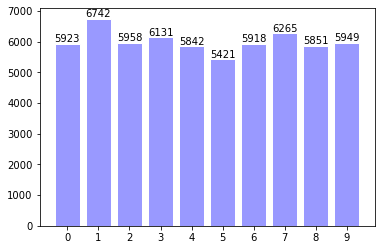

In [ ]:
# 画一个直方图,看看数据集中各个数字的数据量
X = []
Y = []

for i in range(10):
    x = i
    y = np.sum(labels_train == i)
    X.append(x)
    Y.append(y)
    plt.text(x, y, '%s' % y, ha='center', va= 'bottom')

plt.bar(X, Y, facecolor='#9999ff', edgecolor='white')
plt.xticks(X)
plt.show()

# Defining a Neural Network
define its architecture (the number and types of layers, and their interconnectivity

In [ ]:
# Method 1 -- 3 layer MLP network called “net”
# you can define a sequence of layers, it is assumed that the output of one layer provides the input to the next. 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

net = Sequential()
net.add(Dense(800, activation='relu', input_shape=(784,)))
net.add(Dense(400, activation='relu'))
net.add(Dense(10, activation='softmax'))
# activation functions -- https://keras.io/activations/
# different types of layers that can be used -- https://keras.io/layers/

In [ ]:
# to build a simple CNN using convolutional, maxpooling, as well as dense layers (and with dropout for one layer):
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
input_shape=(28,28,1)))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(rate=0.5))
net.add(Dense(10, activation='softmax'))

In [ ]:
# Method 2 -- 3 layer MLP network (equivalent to that built using method 1)
# you can name the output of each layer, and to use these name to define where each layer receives input from. 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
input_img = Input(shape=(784,)) # define a placeholder for the input data
x = Dense(800, activation='relu')(input_img)
y = Dense(400, activation='relu')(x)
z = Dense(10, activation='softmax')(y)
net = Model(input_img, z)

In [ ]:
# This method allows the construction of networks in which one layer supplies input to multiple other layers, 
# and/or one layer receives input from multiple other layers, e.g.:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate
input_img = Input(shape=(784,)) # define a placeholder for the input data
x = Dense(800, activation='relu')(input_img)
y1= Dense(100, activation='tanh')(x)
y2= Dense(200, activation='relu')(x)
y = concatenate([y1, y2])
z = Dense(10, activation='softmax')(y)
net = Model(input_img, z)

In [ ]:
# Note, the variable name used for one layer can be reused (overwritten) by another layer. For
# example, a simple CNN equivalent to that built with method 1, can be constructed like so:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout, Input
inputs = Input(shape=x_train.shape[1:])
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
outputs = Dense(10, activation='softmax')(x)
net = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Whichever method is used to define a network, a textual description of its structure can be obtained using:
net.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0   

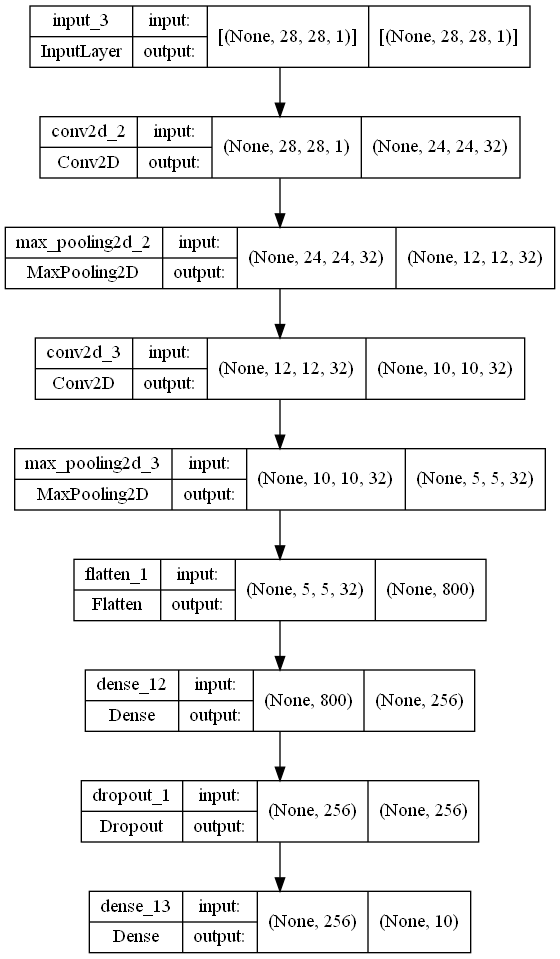

In [ ]:
# or an image can be obtained using:
from tensorflow.keras.utils import plot_model
plot_model(net, to_file='network_structure.png', show_shapes=True)

# define model


In [ ]:
# calculate mean and standard deviation
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

# function to normalize input data
def norm_input(x): return (x-mean_px)/std_px



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
# Batchnorm + dropout + data augmentation
def create_model():
  net = Sequential()
  net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
  input_shape=(28,28,1)))
  net.add(MaxPool2D(pool_size=(2, 2)))
  net.add(Conv2D(32, (3, 3), activation='relu'))
  net.add(MaxPool2D(pool_size=(2, 2)))
  net.add(Flatten())
  net.add(Dense(256, activation='relu'))
  net.add(Dropout(rate=0.5))
  net.add(Dense(10, activation='softmax'))
  # print(net.summary())
  # model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  return net

In [ ]:
models = []
weights_epoch = 0

for i in range(10):
  m = create_model()
  models.append(m)

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
batch_size = 512
gen = ImageDataGenerator(rotation_range=12, width_shift_range=0.1, shear_range=0.3,
                        height_shift_range=0.1, zoom_range=0.1, data_format='channels_first')
batches = gen.flow(x_train, y_train, batch_size=batch_size)
test_batches = gen.flow(x_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))


eval_batch_size = 512

# how many iterations with how many epochs we want to train
num_iterations = 1
num_epochs = 1
for iteration in range(num_iterations):
    cur_epoch = (iteration+1)*num_epochs + weights_epoch
    print("iteration {}, cur_epoch {}".format(iteration+1, cur_epoch))
    
    # train models for specified number of epochs
    for i,m in enumerate(models):
        opt = tf.keras.optimizers.Adam(learning_rate=0.01)
        m.compile(loss='categorical_crossentropy', optimizer=opt)

        # You can either instantiate an optimizer before passing it to model.compile(), or you can pass it by its string identifier(use default parameters)
        # m.compile(loss='categorical_crossentropy', optimizer='adam')
        
        # Usage in a custom training loop
        # When writing a custom training loop, you would retrieve gradients via a tf.GradientTape instance, then call optimizer.apply_gradients() to update your weights:

        # Instantiate an optimizer.
        optimizer = tf.keras.optimizers.Adam()

        # # Iterate over the batches of a dataset.
        # for x, y in dataset:
        #     # Open a GradientTape.
        #     with tf.GradientTape() as tape:
        #         # Forward pass.
        #         logits = model(x)
        #         # Loss value for this batch.
        #         loss_value = loss_fn(y, logits)

        # # Get gradients of loss wrt the weights.
        # gradients = tape.gradient(loss_value, model.trainable_weights)

        # # Update the weights of the model.
        # optimizer.apply_gradients(zip(gradients, model.trainable_weights))





        h = m.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=0, validation_data=test_batches, validation_steps=validation_steps)
        
        # save model weights
        m.save_weights("dropout_0.2/weights/{:03d}epochs_weights_model_{}.pkl".format(cur_epoch, i))
        
        
    # # evaluate test error rate for ensemble
    # all_preds = np.stack([m.predict(x_test, batch_size=eval_batch_size) for m in models]) 
    # avg_preds = all_preds.mean(axis=0)
    # test_error_ensemble = (1 - keras.metrics.categorical_accuracy(y_test, avg_preds).eval().mean()) * 100
    
    # # write test error rate for ensemble and every single model to text file
    # with open("dropout_0.2/history/test_errors_epoch_{:03d}.txt".format(cur_epoch), "w") as text_file:
    #     text_file.write("epoch: {} test error on ensemble: {}\n".format(cur_epoch, test_error_ensemble))

    #     for m in models:
    #         pred = np.array(m.predict(x_test, batch_size=eval_batch_size))
    #         test_err = (1 - keras.metrics.categorical_accuracy(y_test, pred).eval().mean()) * 100
    #         text_file.write("{}\n".format(test_err))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (60000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (10000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


iteration 1, cur_epoch 1


KeyboardInterrupt: ignored

# Training a Neural Network 

In [ ]:
# This is achieved by first compiling the network, at this stage the cost function (https://keras.io/losses/) and 
# the optimizer (https://keras.io/optimizers/) that is to be used for training is defined. 
# Next the training is performed using the function fit. This function needs to be supplied with 
# the training data, and optionally, validation data, and other parameters such as 
# the number of epochs and the batch size to be used, e.g.:
net.compile(loss='categorical_crossentropy', optimizer='adam')
history = net.fit(x_train, y_train,
validation_data=(x_test, y_test), epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 23s 96ms/step - loss: 0.3356 - val_loss: 0.0715
Epoch 2/20
235/235 [==============================] - 22s 93ms/step - loss: 0.0870 - val_loss: 0.0422
Epoch 3/20
235/235 [==============================] - 22s 93ms/step - loss: 0.0630 - val_loss: 0.0341
Epoch 4/20
235/235 [==============================] - 22s 93ms/step - loss: 0.0516 - val_loss: 0.0281
Epoch 5/20
235/235 [==============================] - 22s 94ms/step - loss: 0.0449 - val_loss: 0.0246
Epoch 6/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0383 - val_loss: 0.0226
Epoch 7/20
235/235 [==============================] - 22s 93ms/step - loss: 0.0333 - val_loss: 0.0247
Epoch 8/20
235/235 [==============================] - 23s 97ms/step - loss: 0.0303 - val_loss: 0.0279
Epoch 9/20
235/235 [==============================] - 22s 94ms/step - loss: 0.0284 - val_loss: 0.0243
Epoch 10/20
235/235 [==============================] - 22s 95ms/step - loss: 0.025

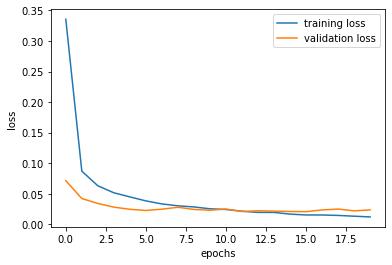

In [ ]:
# The history variable returned by the fit function can be used to produce a plot showing the
# change in the cost function during training:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [ ]:
# A trained network can be saved to disk using:
net.save("network_for_mnist.h5")

In [ ]:
# A saved model can be reloaded using:
from tensorflow.keras.models import load_model
net=load_model("network_for_mnist.h5")

# Testing a Neural Network

In [ ]:
# The performance of the trained network can be tested, for example, by finding the outputs that
# it produces to the testing data, and comparing these to the true category labels:
import numpy as np
outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
misclassified=sum(labels_predicted!=labels_test)
print('Percentage misclassified = ',100*misclassified/labels_test.size)

Percentage misclassified =  0.7


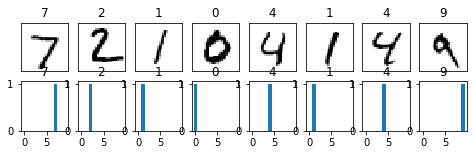

In [ ]:
# To show the outputs a network produces for a few specific exemplars:
plt.figure(figsize=(8, 2))
for i in range(0,8):
    ax=plt.subplot(2,8,i+1)
    plt.imshow(x_test[i,:].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    plt.title(labels_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(0,8):
#     output = net.predict(x_test[i,:].reshape(1, 784)) #if MLP
    output = net.predict(x_test[i,:].reshape(1, 28,28,1)) #if CNN
    output=output[0,0:]
    plt.subplot(2,8,8+i+1)
    plt.bar(np.arange(10.),output)
    plt.title(np.argmax(output))

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model

#load .h5 file of arbitrary name for testing (last if more than one)
print(os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".h5"):
        print(file)
        net=load_model(file)
net.summary()

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
    netType='CNN'
else:
    netType='MLP'
    
#test with MNIST data
# from tensorflow.keras.datasets import mnist
# (x_train, labels_train), (x_test, labels_test) = mnist.load_data()
# x_test = x_test.astype('float32')
# x_test /= 255
if netType in ['MLP']:
    x_test = x_test.reshape(10000, 784)
else:
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
outputs=net.predict(x_test)

# Returns the indices of the maximum values along an axis.
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST= ',100*correct_classified/labels_test.size)


/content
